This is a notebook of an Exploratory Data Analysis of library records of books borrowed collected  by the SixthSense Initiative at the 5th edition of their Summer Children Reading Camp. This data was collected to get a better understanding of camper book borrowing and reading activity while on camp. This record of the books borrowed  by the campers (ages 8 to 15) during a 7 days the camp. The records include information such as the <strong>cell number</strong> allocated to each camper, <strong>title of the book</strong> borrowed, the <strong>number of pages</strong> the books borrowed has, if a <strong>camper completed a book</strong>, <strong>the number of pages</strong> read, the <strong>time and date the book</strong> was borrowed as well as the <strong>time and date</strong> it was returned.

In [47]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [48]:
# Loading the dataset
lib_df = pd.read_csv('Library_Records.csv')
lib_df.head()

,Cell Number,Title of Book Borrowed,Time Borrowed,Number of Book Pages,Finished Book (Y/N),Pages Read,Time Returned,Date Borrowed,Date Returned
0,C004,The big bells the little bells,12:14,12,Yes,12,17:36,08/08/2022,08/08/2022
1,B001,I see hope,12:15,36,Yes,36,22:22,08/08/2022,08/08/2022
2,E003,Babby sitters,12:16,106,Yes,106,07:48,08/08/2022,09/08/2022
3,E008,Sam nd the night,12:16,12,Yes,12,17:31,08/08/2022,08/08/2022
4,D003,Justice,12:17,57,Yes,57,19:25,08/08/2022,08/08/2022


In [49]:
# Checking the shape of the dataset
lib_df.shape

(145, 9)

In [50]:
# Checking the data types of each column
lib_df.dtypes

Cell Number               object
Title of Book Borrowed    object
Time Borrowed             object
Number of Book Pages       int64
Finished Book (Y/N)       object
Pages Read                object
Time Returned             object
Date Borrowed             object
Date Returned             object
dtype: object

## Data cleaning and feature engineering 

In [51]:
# Checking the missing data
lib_df.isnull().sum()

Cell Number                0
Title of Book Borrowed     0
Time Borrowed              0
Number of Book Pages       0
Finished Book (Y/N)       13
Pages Read                13
Time Returned             18
Date Borrowed              0
Date Returned              6
dtype: int64

In [52]:
# Renaming columns for convinience
col_rename = {'Cell Number' : 'cell_number', 
 'Title of Book Borrowed' : 'book_title',
 'Time Borrowed' : 'time_borrowed',
'Number of Book Pages' : 'book_length',
'Finished Book (Y/N)': 'completed_book',
'Pages Read' : 'book_length_read',
'Time Returned' : 'time_returned',
'Date Borrowed' : 'date_borrowed',
'Date Returned' : 'date_returned'}

df_lib = lib_df.rename(columns = col_rename)
df_lib.columns

Index(['cell_number', 'book_title', 'time_borrowed', 'book_length',
       'completed_book', 'book_length_read', 'time_returned', 'date_borrowed',
       'date_returned'],
      dtype='object')

In [53]:
# Combining the date and time columns and converting them to datetime format
df_lib['date_returned'] =  pd.to_datetime(df_lib['date_returned'].str.cat(df_lib['time_returned'], sep=' '))
df_lib['date_borrowed'] = pd.to_datetime(df_lib['date_borrowed'].str.cat(df_lib['time_borrowed'], sep=' '))

In [54]:
#dropping the date and time columns
df_lib.drop('time_borrowed', axis = 1, inplace = True)

In [55]:
# Creating the days column
import datetime as dt
map_day = {8 : 'Monday', 9: 'Tuesday', 10: 'Wednesday', 11: 'Thursday', 12: 'Friday'}
df_lib['days_borrowed'] = df_lib['date_borrowed'].dt.month
df_lib['days_borrowed'] = df_lib['days_borrowed'].map(map_day)
df_lib['borrow_hour'] = df_lib['date_borrowed'].dt.hour

In [56]:
# Data types of columns
df_lib.dtypes

cell_number                 object
book_title                  object
book_length                  int64
completed_book              object
book_length_read            object
time_returned               object
date_borrowed       datetime64[ns]
date_returned       datetime64[ns]
days_borrowed               object
borrow_hour                  int64
dtype: object

In [57]:
# Dealing with missing data and wrong inputs
df_lib['book_length_read'] = df_lib['book_length_read'].replace('All', int(4))

# There is a typo in the book title column which is about to be replaced
df_lib['book_title'] = df_lib['book_title'].str.replace('Babby sitters', 'Baby sitters')

# Creating the cell column to get the cell of each camper
df_lib['cell'] = df_lib['cell_number'].apply(lambda x: x[0])

In [58]:
# The null values wuth regards to the number of book pages
df_lib[df_lib['book_length_read'].isna()]

,cell_number,book_title,book_length,completed_book,book_length_read,time_returned,date_borrowed,date_returned,days_borrowed,borrow_hour,cell
49,F003,The smart reader level 2,24,NaN,NaN,NaN,2022-09-08 07:46:00,NaT,Tuesday,7,F
57,B006,Emma's Nightmare,24,NaN,NaN,NaN,2022-09-08 10:13:00,NaT,Tuesday,10,B
59,B003,The mid-wife's apprentice,122,NaN,NaN,NaN,2022-09-08 10:16:00,NaT,Tuesday,10,B
61,C008,A warrior for freedom,24,NaN,NaN,NaN,2022-09-08 10:21:00,NaT,Tuesday,10,C
63,A002,How my body works,28,NaN,NaN,NaN,2022-09-08 11:34:00,NaT,Tuesday,11,A
66,B001,How my body works,27,NaN,NaN,NaN,2022-09-08 11:40:00,NaT,Tuesday,11,B
75,B004,How my body works,28,NaN,NaN,NaN,2022-09-08 14:43:00,NaT,Tuesday,14,B
77,F009,How my body works,27,NaN,NaN,NaN,2022-09-08 14:49:00,NaT,Tuesday,14,F
78,D003,Uncle Jed's Barbershop,30,NaN,NaN,NaN,2022-09-08 14:54:00,NaT,Tuesday,14,D
84,F008,Segun keeps his promise,8,NaN,NaN,NaN,2022-09-08 17:50:00,NaT,Tuesday,17,F


In [59]:
len(df_lib['days_borrowed'])/5

29.0

# Exploring the data

The camp population distribution by age and gender is looked at but firstly, there is need to import the dataset containing the two columns and merging it with the library data

In [60]:
# importing the age and gender dataset
age_gender = pd.read_csv('gender_age_cell.csv')
age_gender['Cell'] = age_gender.Cell.str.replace(" ", "")
age_gender['Gender'] = age_gender.Gender.str.strip()

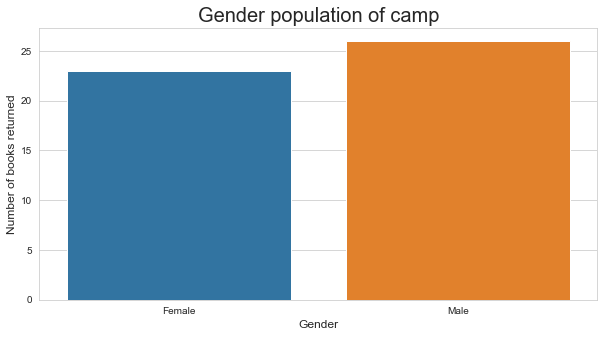

In [61]:
# Number of male and female campers
plt.figure(figsize = (10, 5))
sns.countplot(data = age_gender, x = 'Gender')
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Number of books returned', fontsize = 12)
plt.title('Gender population of camp', fontsize = 20)
plt.show()

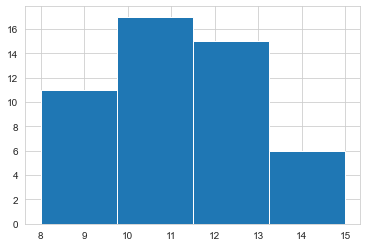

In [62]:
#Age distribution of campers
age_gender.Age.hist(bins = 4)
plt.show()

As seen above there are more male campers than female campers and the age of the campers is fairly evenly distributed between ages 8 and 15.

In [63]:
# Merging the age and gender column to the library table
lib_age_gender = df_lib.merge(age_gender, left_on = 'cell_number', right_on = 'Cell', how = 'left')
lib_age_gender.drop('Cell', inplace = True, axis = 1)

In [64]:
# Filtering out rows that have no time returned
filtered = lib_age_gender[~lib_age_gender['time_returned'].isnull()]
filtered = filtered[filtered['cell_number'] != 'Volunteer']
filtered['book_length_read'] = filtered['book_length_read'].astype('int')
print(filtered.shape)

(121, 13)


In [65]:
# Books and number of books borrowed
print('the number of books borrowed: '  + str(filtered['book_title'].nunique()), '\n')
print(filtered['book_title'].unique())

the number of books borrowed: 61 

['The big bells the little bells' 'I see hope' 'Baby sitters'
 'Sam nd the night' 'Justice' 'Tack against Time' 'Teaching Children'
 'The smart reader' 'The night before' 'The power twins' 'The Mona Lisa'
 'Pom pom' 'The big log' 'Bambi Grows up' 'The smart reader level 2'
 'On my honor' 'Goodbye mummy' "Emma's Nightmare" 'Barista Unleashed'
 'The day boy & night girl' "Uncle Jed's Barbershop" 'Is anybody there'
 "Nafi's song" 'The education of M.B' 'The bones book' 'Smart reader'
 'The acorn people' 'Eagles Patch' 'The call of the wild'
 'Patrick Doyle is full of B.' 'The Pharohs of ancient Egypt'
 "Who's there" 'Daniel Boone' "The mid-wife's apprentice" 'Molly Donnelly'
 'Inter-millennial verses' 'The bones and skeleton'
 'Funerals and fly fishing' 'Murder in cabin A-13' 'Hannah Montana'
 'Abimbolu' 'Segun keeps his promise' 'Newspaper' 'How my body works'
 'The middlemen' 'Segun the peace keeper' 'Segun the hard worker'
 'Hide & go boo' 'Sharing Su

In [66]:
#The most borrowed book and were most of the books borrowed finished all the time?
most_borrowed_books = pd.crosstab(filtered['book_title'], filtered['completed_book']).sort_values('Yes', ascending = False)
most_borrowed_books['borrowed_count'] = most_borrowed_books['No'] + most_borrowed_books['Yes']
print(most_borrowed_books['No'].sum())
print(most_borrowed_books['Yes'].sum())

22
99


In [67]:
# Filtering out rows 0f books borrowed by volunteers
dest = lib_age_gender[lib_age_gender['cell_number'] != 'Volunteer']
nesw = dest[~dest['time_returned'].isnull()]
print(dest.shape[0] - nesw.shape[0])
print(dest['book_title'].nunique())

17
63


Of the 200 different books made available in the Library, books were borrowed 63 were borrowed and of the 138 times books were borrowed and returned by campers, the books were not read to completion 17 times.

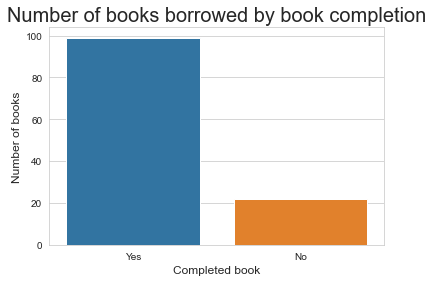

In [68]:
# Plot showing number of books copleted or not
sns.countplot(data = filtered, x = 'completed_book')
plt.xlabel('Completed book', fontsize = 12)
plt.ylabel('Number of books', fontsize = 12)
plt.title('Number of books borrowed by book completion', fontsize = 20)

plt.show()

In [69]:
# Campers with the highest and lowest amount of books borrowed
number_books_read = filtered.groupby('cell_number').agg({'cell_number': 'count'})\
.rename(columns = {'cell_number': 'c_number'})\
.sort_values('c_number', ascending = False)
top_ten = number_books_read[1:10]
bottom_ten = number_books_read[-10:]
display(number_books_read.head())
display(number_books_read.tail())

,c_number
cell_number,
E003,7
E008,7
E001,6
D002,5
C004,5


,c_number
cell_number,
B006,1
C003,1
C006,1
D008,1
D001,1


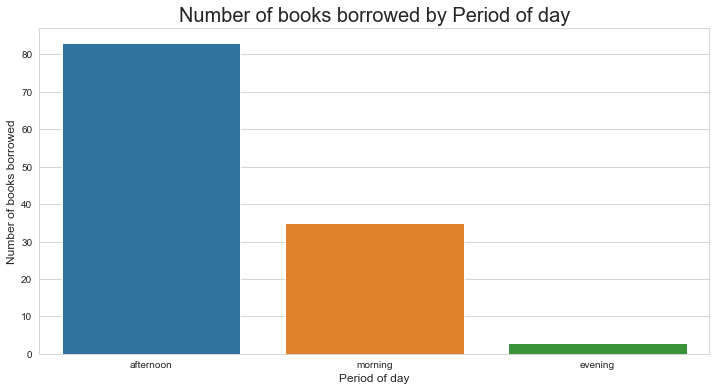

In [70]:
# Period of the day when books were borrowed
dest = []
for x in filtered.borrow_hour.values:
    if x <= 11.9:
        dest.append('morning')
    elif x <= 17.9:
        dest.append('afternoon')
    else:
        dest.append('evening')
plt.figure(figsize = (12, 6))
sns.countplot(x = dest)
plt.xlabel('Period of day', fontsize = 12)
plt.ylabel('Number of books borrowed', fontsize = 12)
plt.title('Number of books borrowed by Period of day', fontsize = 20)
plt.show()

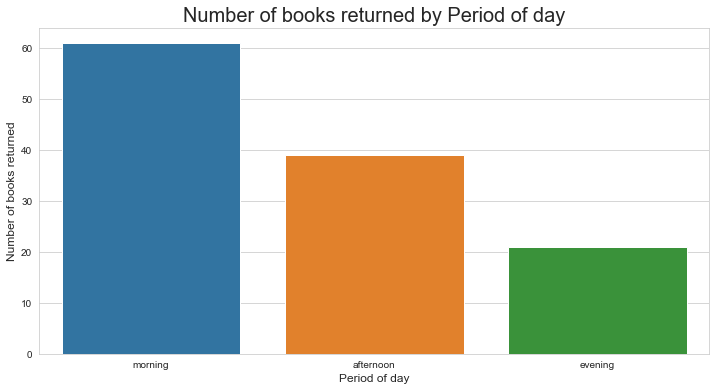

In [71]:
# Period of the day when books were returned
return_hour = filtered['date_returned'].dt.hour
dest = []
for x in return_hour.sort_values().values:
    if x <= 11.9:
        dest.append('morning')
    elif x <= 17.9:
        dest.append('afternoon')
    else:
        dest.append('evening')
plt.figure(figsize = (12, 6))
sns.countplot(x = dest)
plt.xlabel('Period of day', fontsize = 12)
plt.ylabel('Number of books returned', fontsize = 12)
plt.title('Number of books returned by Period of day', fontsize = 20)
plt.show()

,Gender,number_of_books_borrowed,number_of_pages_read
0,Female,69,43.0
1,Male,52,64.0


<Figure size 864x432 with 0 Axes>

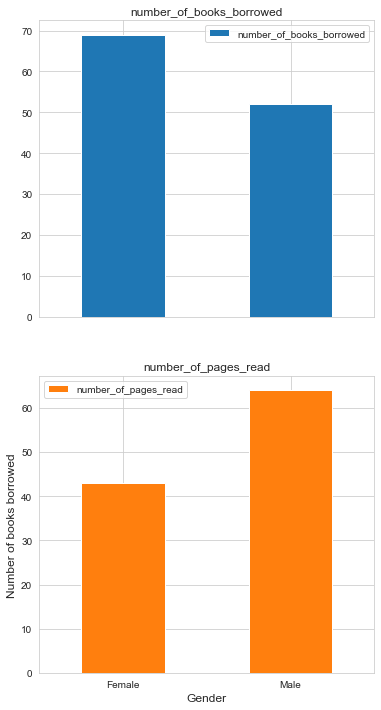

In [73]:
# The total amount of books read by each gender and and total pages red
gender_read = filtered.groupby('Gender').agg({'Gender':'count', 'book_length_read': 'mean'})\
.rename(columns = {'Gender': 'number_of_books_borrowed', 'book_length_read': 'number_of_pages_read'})\
.reset_index().round()

display(gender_read)

# A plot of books borrowed and pages read by gender 
plt.figure(figsize = (12, 6))
gender_read.plot(kind = 'bar', x = 'Gender', subplots = True, figsize = (6, 12), rot = 0)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Number of books borrowed', fontsize = 12)
plt.show();

In [74]:
# The average book read
age_filt = filtered.groupby('Age').agg({'Age':'count', 'book_length_read': 'mean'})\
.rename(columns = {'Age': 'number_of_times_books_were_borrowed'}).sort_values('number_of_times_books_were_borrowed')\
.round()
age_filt

,number_of_times_books_were_borrowed,book_length_read
Age,,
14.0,6,85.0
15.0,6,63.0
9.0,12,48.0
13.0,13,49.0
12.0,18,78.0
10.0,21,56.0
11.0,21,45.0
8.0,24,26.0


In [75]:
# Age distribution by Gender
filtered.groupby(['Gender','Age']).agg({'Gender': 'count'}).round().unstack()

Gender                                   
Age      8.0  9.0  10.0 11.0 12.0 13.0 14.0 15.0
Gender                                          
Female     18    8   10   13    6    6    5    3
Male        6    4   11    8   12    7    1    3

In [76]:
# Age distribution by gender and cell
filtered.groupby(['Gender','cell']).agg({'Gender': 'count'}).round().unstack()

Gender                   
cell        A  B   C   D   E   F
Gender                          
Female      9  7  10   9  24  10
Male        8  8  10  10   8   8

In [77]:
# Number of book pages read by age and gender 
filtered.groupby(['Gender','Age']).agg({'book_length_read': 'mean'}).round().unstack()

book_length_read                                           
Age                8.0   9.0   10.0  11.0  12.0  13.0   14.0  15.0
Gender                                                            
Female             28.0  28.0  40.0  42.0  60.0  41.0   80.0  84.0
Male               18.0  86.0  71.0  50.0  87.0  56.0  110.0  42.0

In [78]:
# pages read by gender and cell
filtered.groupby(['Gender','cell']).agg({'book_length_read': 'mean'}).round().unstack()

book_length_read                              
cell                  A     B     C     D     E     F
Gender                                               
Female             39.0  79.0  45.0  53.0  32.0  35.0
Male               61.0  32.0  48.0  93.0  58.0  84.0

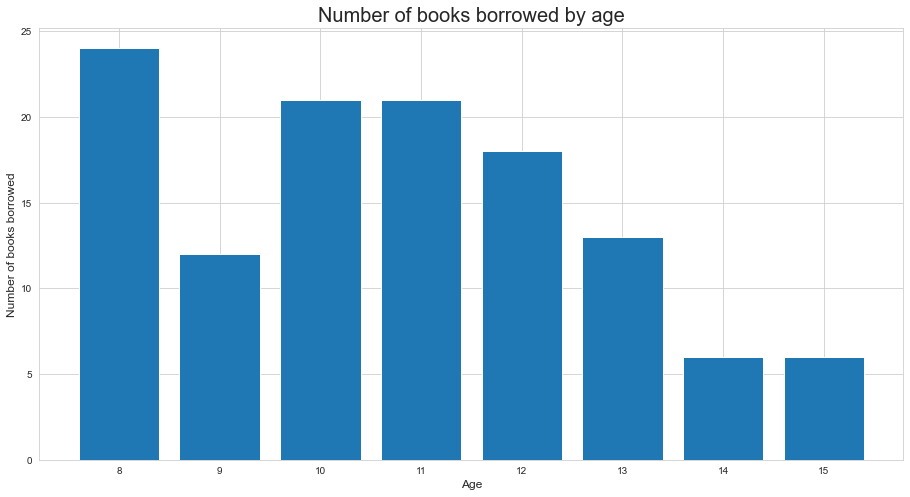

In [79]:
# Books borrowed by age
fig = plt.figure(figsize = (12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(age_filt.index, "number_of_times_books_were_borrowed", data = age_filt)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Number of books borrowed', fontsize = 12)
plt.title('Number of books borrowed by age', fontsize = 20)
plt.show()

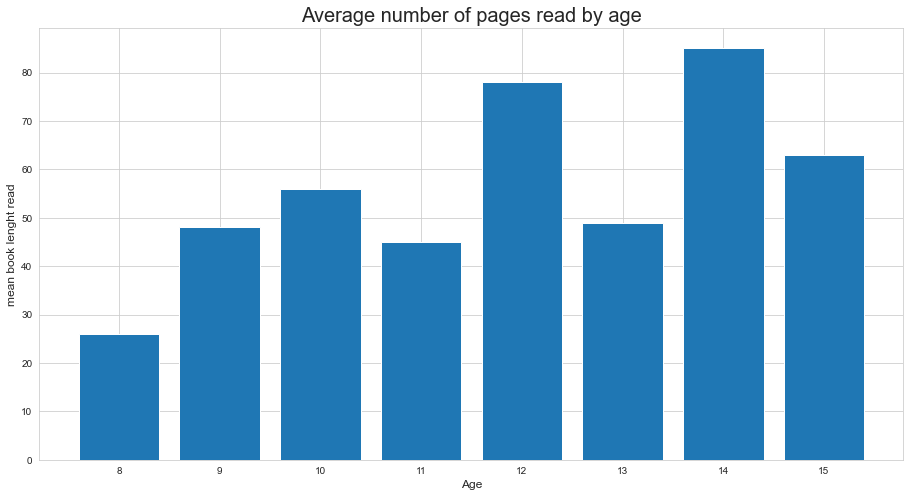

In [80]:
# Average number of pages read by age
fig = plt.figure(figsize = (12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(age_filt.index, "book_length_read", data = age_filt)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('mean book lenght read', fontsize = 12)
plt.title('Average number of pages read by age', fontsize = 20)
plt.show()

The majority of books borrowed were in the afternoons and returned mostly in the mornings. Looking overall at the data, female campers borrowed more books but on average boys read more book pages. If this is further broken down into subgroups, it can be seen that there isn't much difference in the number of books borrowed and pages read. It can also be seen that the borrowing based on age is well distributed. However, borrowing more books as seen in the data doesn't mean reading more.

In [81]:
# The books read daily by cell
cell_seor = filtered.groupby(['days_borrowed', 'cell']).agg({'cell':'count', 'book_length_read': 'mean'})\
                                                        .sort_index(ascending = False)
cell_seor

cell  book_length_read
days_borrowed cell                        
Wednesday     F        3         50.000000
              E        7         18.285714
              D        4        127.750000
              C        5         14.800000
              B        1         10.000000
              A        5         48.000000
Tuesday       F        3         14.333333
              E       10         33.200000
              D        6         59.166667
              C        3         66.666667
              B        5         47.600000
              A        5         35.000000
Thursday      F        1         35.000000
              E        4         47.250000
              C        1         24.000000
              B        2        135.000000
Monday        F        8         74.250000
              E        8         66.000000
              D        8         65.500000
              C        9         66.222222
              B        6         44.833333
              A        7         61.000000
Friday        F        3         68.666667
              E        3         16.000000
              D        1         20.000000
              C        2         20.000000
              B        1         24.000000

In [82]:
# The books read by cell
cell_borrowed = filtered.groupby('cell').agg({'cell':'count', 'book_length_read': 'mean'})\
                                    .sort_values('book_length_read')\
                                    .round()
cell_borrowed

,cell,book_length_read
cell,,
E,32,38.0
C,20,47.0
A,17,50.0
B,15,54.0
F,18,57.0
D,19,74.0


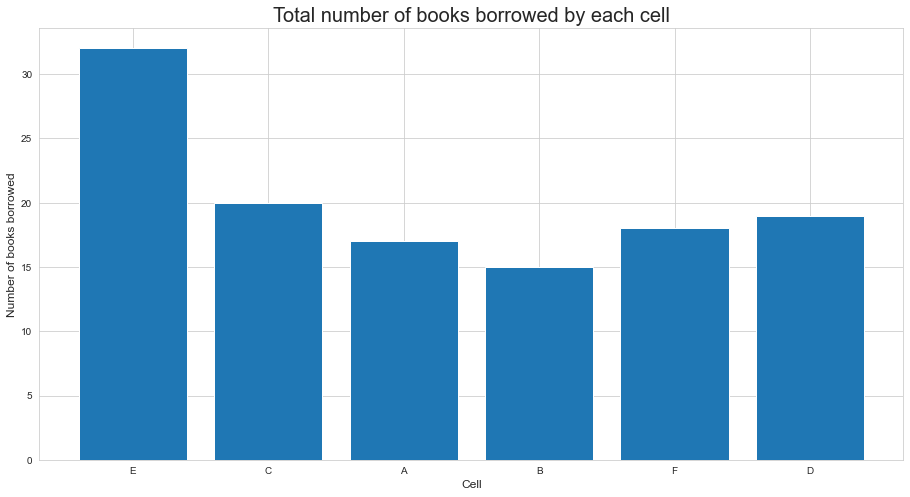

In [83]:
# Graph showing the total number of books borrowed by cell
fig = plt.figure(figsize = (12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(cell_borrowed.index, "cell", data = cell_borrowed)
plt.xlabel('Cell', fontsize = 12)
plt.ylabel('Number of books borrowed', fontsize = 12)
plt.title('Total number of books borrowed by each cell', fontsize = 20)
plt.show()

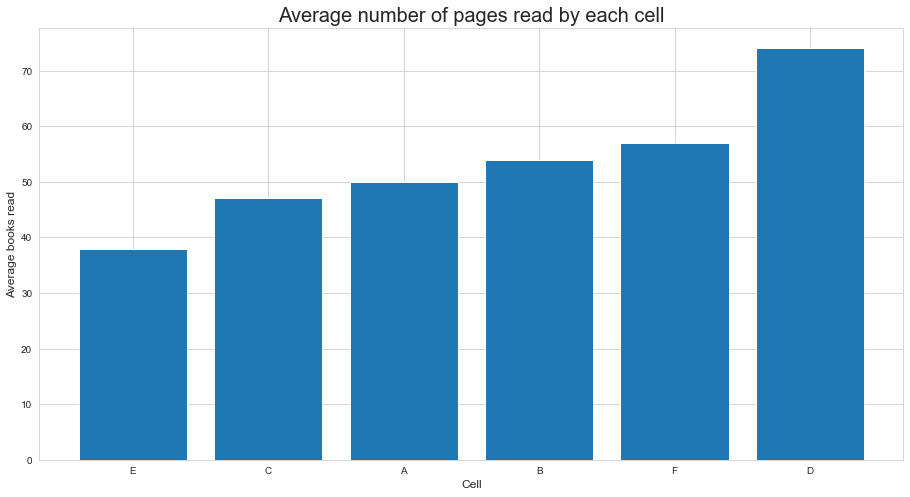

In [84]:
# Graph showing the total pages read by cell
fig = plt.figure(figsize = (12,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(cell_borrowed.index, "book_length_read", data = cell_borrowed)
plt.xlabel('Cell', fontsize = 12)
plt.ylabel('Average books read', fontsize = 12)
plt.title('Average number of pages read by each cell', fontsize = 20)
plt.show()

Looking at the books borrowed and pages read based of the cells campers were allocated it shows that just as seen from the age perspective, the number of books borrowed do not determine how many pages or how much you have read 

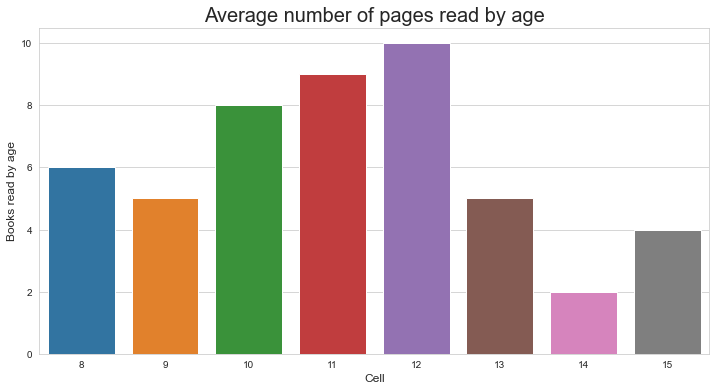

In [85]:
# Book borrowed by age
fig = plt.figure(figsize = (12,6))
sns.countplot(x = age_gender.Age)
plt.xlabel('Cell', fontsize = 12)
plt.ylabel('Books read by age', fontsize = 12)
plt.title('Average number of pages read by age', fontsize = 20)
plt.show()

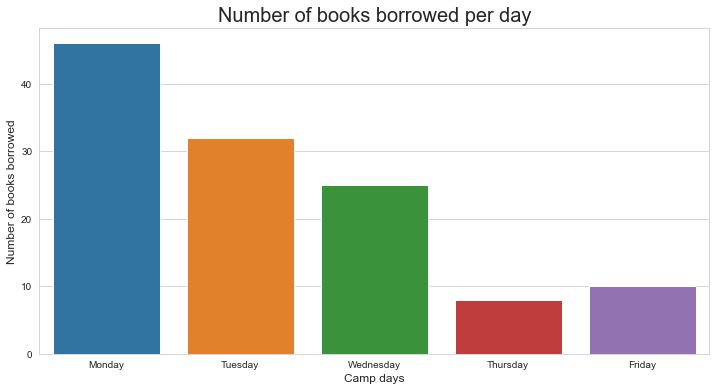

In [88]:
# Amount of books borrowed each day
fig = plt.figure(figsize = (12,6))
sns.countplot(x = filtered['days_borrowed'])
plt.xlabel('Camp days', fontsize = 12)
plt.ylabel('Number of books borrowed', fontsize = 12)
plt.title('Number of books borrowed per day', fontsize = 20)
plt.show()

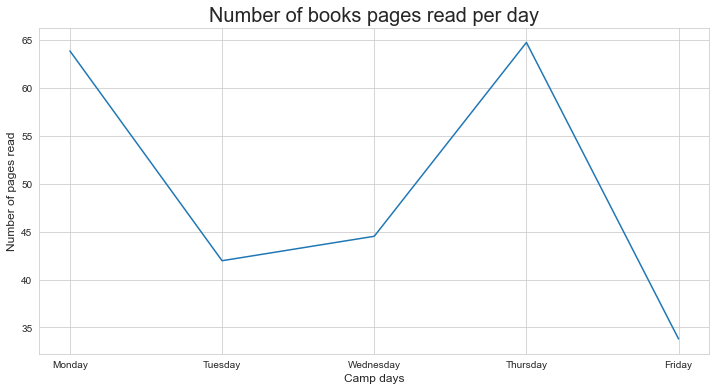

In [89]:
# Amount of books borrowed each day
fig = plt.figure(figsize = (12,6))
sns.lineplot(x = 'days_borrowed', y = 'book_length_read', data = filtered, ci = None)
plt.xlabel('Camp days', fontsize = 12)
plt.ylabel('Number of pages read', fontsize = 12)
plt.title('Number of books pages read per day', fontsize = 20)
plt.show()

### Conclusion

There are no conclusions or conjectures to be made from this dataset because firstly there are certain conditions that were not captured perfectly while the camp was open, secondly it cannot be used to gauge or determine the reading habits of the campers or children in general if considered in a different enviroment and given that the camp is unique in its setup. The main focus of the camp is reading and building reading habits. It can however be said that the data gives insight into what was reading habits of the campers given their age gender and groups they were distributed and to a certian extent the attitude of the campers to reading during the camping exercise.  